# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 


### 저작권 표시
본 자료는 다음을 바탕으로 만들어졌습니다.

http://pandas.pydata.org/pandas-docs/stable/10min.html

본 자료의 저작권은 [BSD-3-Clause](https://https://opensource.org/licenses/BSD-3-Clause) 입니다.


**Pandas**
- 데이터 처리와 분석을 위한 python library
- Wes MacKinney가 경제 와 금융 데이터를 보기위해 시작한 library
- 색인(Index, column)이 있는 Table 데이터에 적합
- Dataframe과 Series라는 자료형(=class)를 활용

**References**
- [10min to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Dataframe Cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


Customarily, we import as follows:

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 도움말 기능
# help(pd.DataFrame.shape)
# pd.DataFrame.shape?

help(pd.DataFrame.sort_index)
pd.DataFrame.sort_index?

# colab 단축키
# https://surfonmedia.tistory.com/1

Help on function sort_index in module pandas.core.frame:

sort_index(self, axis: 'Axis' = 0, level: 'Level | None' = None, ascending: 'bool | int | Sequence[bool | int]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc' = None)
    Sort object by labels (along an axis).
    
    Returns a new DataFrame sorted by label if `inplace` argument is
    ``False``, otherwise updates the original DataFrame and returns None.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default True
        Sort ascending vs. descending. When the index is a MultiIndex th

In [ ]:
%matplotlib inline #colab에서 그래프를 띄우기 위한 명령어

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [ ]:
# Series object 생성
s = pd.Series([1,3,5,np.nan,6,8])

# index 미입력시 0부터 시작하는 숫자로 자동으로 입력됨 

In [ ]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [ ]:
dates = pd.date_range('20130101', periods=6)
# range와 같이 날짜를 생성해주는 함수

In [ ]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 실습을 위한 샘플 Dataframe 생성
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
# dates를 index로 하는, 6 by 4 크기의 정규 분포의 랜덤 숫자로 이루어진 Dataframe

In [ ]:
df

,A,B,C,D
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-04,-0.108757,-0.958267,0.407331,0.187037
2013-01-05,1.092380,2.841777,-0.125714,-0.760722
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [ ]:
# 여러가지 datatype의 컬럼을 가지는 Dataframe의 생성
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [ ]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [ ]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [ ]:
df.head()
# 기본은 5줄 출력

,A,B,C,D
2013-01-01,0.754395,0.053535,-2.103626,0.294001
2013-01-02,1.199926,0.035895,0.283609,0.800978
2013-01-03,1.808687,0.140975,-0.853966,0.133627
2013-01-04,0.956187,1.701224,-1.798741,0.184941
2013-01-05,0.768465,-0.739959,1.895696,-1.285606


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,0.956187,1.701224,-1.798741,0.184941
2013-01-05,0.768465,-0.739959,1.895696,-1.285606
2013-01-06,1.409872,2.581451,1.000871,0.170597


Display the index, columns, and the underlying numpy data

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# FYI
# DateTime index 자료형을 날짜 문자열 형식으로 변환하는 방법
df.index.strftime("%Y-%m-%d %H:%M:%S").tolist()

['2013-01-01 00:00:00',
 '2013-01-02 00:00:00',
 '2013-01-03 00:00:00',
 '2013-01-04 00:00:00',
 '2013-01-05 00:00:00',
 '2013-01-06 00:00:00']

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values
# npy.array 형식으로 반환됨
# index와 column 값이 사라짐에 유의

array([[ 0.75439476,  0.05353519, -2.1036265 ,  0.29400073],
       [ 1.19992629,  0.03589511,  0.28360878,  0.8009784 ],
       [ 1.80868669,  0.14097526, -0.8539662 ,  0.13362689],
       [ 0.95618745,  1.70122351, -1.79874105,  0.1849409 ],
       [ 0.76846547, -0.73995903,  1.89569634, -1.2856061 ],
       [ 1.40987163,  2.581451  ,  1.00087133,  0.17059745]])

Describe shows a quick statistic summary of your data

In [ ]:
df.describe()
# 기초적인 통계 자료 출력

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.245593,0.087534,-0.072483,-0.297124
std,1.407466,1.423367,0.549378,0.651149
min,-1.682384,-0.958267,-1.043931,-1.330950
25%,-0.805462,-0.818678,-0.146146,-0.623695
50%,0.491812,-0.313566,-0.070392,-0.165601
75%,1.451725,0.113515,0.301730,0.110631
max,1.638509,2.841777,0.495447,0.453095


Transposing your data

In [ ]:
df.T
# 대각선을 중심으로 traspose 된 결과 출력

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.571507,-1.037697,-1.682384,-0.108757,1.092380,1.638509
B,0.160021,-0.891196,-0.026006,-0.958267,2.841777,-0.601126
C,-0.015071,0.495447,-0.152957,0.407331,-0.125714,-1.043931
D,-0.118588,0.453095,-0.212614,0.187037,-0.760722,-1.330950


Sorting by an axis

In [ ]:
df.sort_index(axis=1, ascending=False)
# axis=1 은 row 방향 정렬을 의미
# operations 간혹 index의 순서가 뒤섞인 경우가 있음.
# operation 코드 중간 중간에 확인이 필요함.

,D,C,B,A
2013-01-01,0.294001,-2.103626,0.053535,0.754395
2013-01-02,0.800978,0.283609,0.035895,1.199926
2013-01-03,0.133627,-0.853966,0.140975,1.808687
2013-01-04,0.184941,-1.798741,1.701224,0.956187
2013-01-05,-1.285606,1.895696,-0.739959,0.768465
2013-01-06,0.170597,1.000871,2.581451,1.409872


Sorting by value

In [ ]:
df.sort_values(by='B')
# 컬럼을 기준으로 정렬, 여러개의 컬럼이 필요할시 list 형식으로 입력

,A,B,C,D
2013-01-04,-0.108757,-0.958267,0.407331,0.187037
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-05,1.092380,2.841777,-0.125714,-0.760722


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [ ]:
df['A']
# 컬럼의 이름을 기준으로 선택.
# 여러 컬럼 선택시 list로 입력

2013-01-01    1.571507
2013-01-02   -1.037697
2013-01-03   -1.682384
2013-01-04   -0.108757
2013-01-05    1.092380
2013-01-06    1.638509
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [ ]:
df[0:3]
# 현재 데이터 프레임의 0~3 번째 row를 선택

,A,B,C,D
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614


In [ ]:
df['20130102':'20130104']
# index의 값을 기준으로 범위 선택
# 이때 index가 DatetimeIndex 형태로 지정되어 있어 string type의 날짜 형식을 자동으로 인식

,A,B,C,D
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-04,-0.108757,-0.958267,0.407331,0.187037


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [ ]:
date = dates[0]
df.loc[date]
# index label의 값을 기준으로 선택

A    0.754395
B    0.053535
C   -2.103626
D    0.294001
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [ ]:
df.loc[:,['A','B']]
# colum label의 값을 기준으로 선택
# : 는 범위를 지정해 줄 수 있음.

,A,B
2013-01-01,0.754395,0.053535
2013-01-02,1.199926,0.035895
2013-01-03,1.808687,0.140975
2013-01-04,0.956187,1.701224
2013-01-05,0.768465,-0.739959
2013-01-06,1.409872,2.581451


Showing label slicing, both endpoints are included

In [ ]:
df.loc['20130102':'20130104',['A','B']]
# index label, column label의 값을 기준으로 선택

,A,B
2013-01-02,1.199926,0.035895
2013-01-03,1.808687,0.140975
2013-01-04,0.956187,1.701224


Reduction in the dimensions of the returned object

In [ ]:
df.loc['20130102',['A','B']]
# row 하나만 출력할시 Series로 출력

A    1.199926
B    0.035895
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [ ]:
df.loc[dates[0],'A']
# 데이터 하나만 선택할 때

0.754394761141309

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [ ]:
df.iloc[3]
# 현재 데이터 프레임에서의 index 위치에 따라 선택

A   -0.108757
B   -0.958267
C    0.407331
D    0.187037
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [ ]:
df.iloc[3:5,0:2]
# 현재 데이터 프레임에서의 index, column 순서에 따라 선택

,A,B
2013-01-04,-0.108757,-0.958267
2013-01-05,1.092380,2.841777


By lists of integer position locations, similar to the numpy/python style

In [ ]:
df.iloc[[1,2,4],[0,2]]
# 현재 데이터 프레임에서의 index, column 순서에 따라 list를 입력하여 선택

,A,C
2013-01-02,-1.037697,0.495447
2013-01-03,-1.682384,-0.152957
2013-01-05,1.092380,-0.125714


For slicing rows explicitly

In [ ]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.199926,0.035895,0.283609,0.800978
2013-01-03,1.808687,0.140975,-0.853966,0.133627


For slicing columns explicitly

In [ ]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.053535,-2.103626
2013-01-02,0.035895,0.283609
2013-01-03,0.140975,-0.853966
2013-01-04,1.701224,-1.798741
2013-01-05,-0.739959,1.895696
2013-01-06,2.581451,1.000871


For getting a value explicitly

In [ ]:
df.iloc[1,1]

0.035895105696176474

For getting fast access to a scalar (equiv to the prior method)

In [ ]:
df.iat[1,1]
# 값 하나를 선택할때 (매우 빠르게 연산)

0.035895105696176474

## Boolean Indexing

Using a single column’s values to select data.

In [ ]:
df[df.A > 0]
# A열의 값이 0보다 큰 row만 선택

,A,B,C,D
2013-01-01,0.754395,0.053535,-2.103626,0.294001
2013-01-02,1.199926,0.035895,0.283609,0.800978
2013-01-03,1.808687,0.140975,-0.853966,0.133627
2013-01-04,0.956187,1.701224,-1.798741,0.184941
2013-01-05,0.768465,-0.739959,1.895696,-1.285606
2013-01-06,1.409872,2.581451,1.000871,0.170597


A where operation for getting.

In [ ]:
df[df > 0]
# df 전체에서 값을 비교하여 아닐경우 NaN으로 채워진 df를 반환

,A,B,C,D
2013-01-01,1.571507,0.160021,NaN,NaN
2013-01-02,NaN,NaN,0.495447,0.453095
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.407331,0.187037
2013-01-05,1.092380,2.841777,NaN,NaN
2013-01-06,1.638509,NaN,NaN,NaN


Using the isin() method for filtering:

In [ ]:
df2 = df.copy()
# 데이터 프레임 복사

In [ ]:
df2['E'] = ['one','one', 'two','three','four','three']
# 열을 추가할 때

In [ ]:
df2

,A,B,C,D,E
2013-01-01,1.571507,0.160021,-0.015071,-0.118588,one
2013-01-02,-1.037697,-0.891196,0.495447,0.453095,one
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614,two
2013-01-04,-0.108757,-0.958267,0.407331,0.187037,three
2013-01-05,1.092380,2.841777,-0.125714,-0.760722,four
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950,three


In [ ]:
df2[df2['E'].isin(['two','four'])]

## Setting

Setting a new column automatically aligns the data by the indexes

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [ ]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = s1
# dataframe의 각 cell 에는 다른 object가 들어갈 수 있다!

Setting values by label

In [ ]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [ ]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))
# D 열 전체를 5로 선택
# np.array([5] * len(df)) :  length 길이의 5로 채워진 np.array

The result of the prior setting operations

In [ ]:
df

,A,B,C,D
2013-01-01,0.754395,0.053535,-2.103626,0.294001
2013-01-02,1.199926,0.035895,0.283609,0.800978
2013-01-03,1.808687,0.140975,-0.853966,0.133627
2013-01-04,0.956187,1.701224,-1.798741,0.184941
2013-01-05,0.768465,-0.739959,1.895696,-1.285606
2013-01-06,1.409872,2.581451,1.000871,0.170597


A where operation with setting.

In [ ]:
df2 = df.copy()

In [ ]:
df2[df2 > 0] = -df2

In [ ]:
df2

,A,B,C,D
2013-01-01,-0.754395,-0.053535,-2.103626,-0.294001
2013-01-02,-1.199926,-0.035895,-0.283609,-0.800978
2013-01-03,-1.808687,-0.140975,-0.853966,-0.133627
2013-01-04,-0.956187,-1.701224,-1.798741,-0.184941
2013-01-05,-0.768465,-0.739959,-1.895696,-1.285606
2013-01-06,-1.409872,-2.581451,-1.000871,-0.170597


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [ ]:
df1

,A,B,C,D,E
2013-01-01,0.754395,0.053535,-2.103626,0.294001,NaN
2013-01-02,1.199926,0.035895,0.283609,0.800978,NaN
2013-01-03,1.808687,0.140975,-0.853966,0.133627,NaN
2013-01-04,0.956187,1.701224,-1.798741,0.184941,NaN


In [ ]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [ ]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.015071,5,NaN,1.0
2013-01-02,-1.037697,-0.891196,0.495447,5,1.0,1.0
2013-01-03,-1.682384,-0.026006,-0.152957,5,2.0,NaN
2013-01-04,-0.108757,-0.958267,0.407331,5,3.0,NaN


To drop any rows that have missing data.

In [ ]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.754395,0.053535,-2.103626,0.294001,1.0
2013-01-02,1.199926,0.035895,0.283609,0.800978,1.0


In [ ]:
# df1.dropna?

Filling missing data

In [ ]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.754395,0.053535,-2.103626,0.294001,1.0
2013-01-02,1.199926,0.035895,0.283609,0.800978,1.0
2013-01-03,1.808687,0.140975,-0.853966,0.133627,5.0
2013-01-04,0.956187,1.701224,-1.798741,0.184941,5.0


To get the boolean mask where values are nan

In [ ]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [ ]:
df.mean()

A    1.149589
B    0.628854
C   -0.262693
D    0.049756
dtype: float64

Same operation on the other axis

In [ ]:
df.mean(1)
# axis=0 index, 세로
# axis=1 column, 가로

2013-01-01   -0.250424
2013-01-02    0.580102
2013-01-03    0.307331
2013-01-04    0.260903
2013-01-05    0.159649
2013-01-06    1.290698
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [ ]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')
# substraction

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.808687,-0.859025,-1.853966,-0.866373
2013-01-04,-2.043813,-1.298776,-4.798741,-2.815059
2013-01-05,-4.231535,-5.739959,-3.104304,-6.285606
2013-01-06,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [ ]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.754395,0.053535,-2.103626,0.294001
2013-01-02,1.954321,0.089430,-1.820018,1.094979
2013-01-03,3.763008,0.230406,-2.673984,1.228606
2013-01-04,4.719195,1.931629,-4.472725,1.413547
2013-01-05,5.487661,1.191670,-2.577029,0.127941
2013-01-06,6.897532,3.773121,-1.576157,0.298538


In [ ]:
df.apply(lambda x: x.max() - x.min())

# 세로축을 기준으로 최대값과 최소값을 뺀 값을 얻고 싶다.

A    1.054292
B    3.321410
C    3.999323
D    2.086585
dtype: float64

In [ ]:
df.apply(lambda x: x.max() - x.min(), axis=1)
# 가로축 기준

2013-01-01    2.858021
2013-01-02    1.164031
2013-01-03    2.662653
2013-01-04    3.499965
2013-01-05    3.181302
2013-01-06    2.410854
Freq: D, dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [ ]:
s

0    2
1    5
2    1
3    5
4    5
5    3
6    1
7    6
8    4
9    1
dtype: int64

In [ ]:
s.value_counts()

5    3
1    3
2    1
3    1
6    1
4    1
dtype: int64

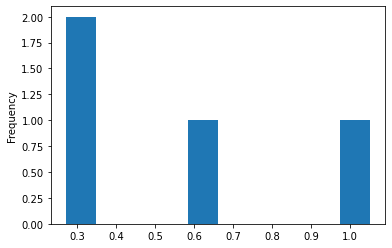

In [ ]:
s.plot.hist()

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.dtype

dtype('O')

In [ ]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))

In [ ]:
df

,0,1,2,3
0,-1.667100,0.689470,0.072439,-0.120513
1,-0.581710,0.964136,0.307103,-0.124602
2,-0.920949,-1.967573,0.442426,1.152687
3,-0.223473,0.001578,1.002005,-0.641015
4,-0.153762,0.701897,0.483509,0.520925
5,-0.883957,0.502836,0.667236,0.426185
6,-0.484978,0.999771,0.267369,0.401263
7,-2.354839,-0.665394,-0.058992,0.272000
8,0.211629,0.797315,1.237772,-0.861279
9,-1.145781,-0.419771,0.267477,0.310892


In [ ]:
# break it into pieces
pieces = [  ]
# df[:3] --> 0~2까지
# df[7:] --> 7에서 끝까지

In [ ]:
pd.concat(pieces)
# concat 할때는 반드시 list로 넣어야 한다.
# cf. pd.concat(df[:3], df[3:7], df[7:])

,0,1,2,3
0,-1.667100,0.689470,0.072439,-0.120513
1,-0.581710,0.964136,0.307103,-0.124602
2,-0.920949,-1.967573,0.442426,1.152687
3,-0.223473,0.001578,1.002005,-0.641015
4,-0.153762,0.701897,0.483509,0.520925
5,-0.883957,0.502836,0.667236,0.426185
6,-0.484978,0.999771,0.267369,0.401263
7,-2.354839,-0.665394,-0.058992,0.272000
8,0.211629,0.797315,1.237772,-0.861279
9,-1.145781,-0.419771,0.267477,0.310892


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [ ]:
left

,key,lval
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on='key')
#
# DB에서 쓰이는 SQL 문법에서의 join과 동일

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [ ]:
df

,A,B,C,D
0,-0.343808,-0.817593,0.552133,-0.026805
1,0.451336,-1.706251,0.365855,-0.047125
2,-1.516993,1.076684,-1.384990,1.541439
3,0.270307,0.336205,1.051845,0.617083
4,-0.633619,1.827216,-0.335702,-0.883516
5,0.144009,2.824824,0.363677,2.224249
6,0.339346,0.105941,-0.525568,1.453361
7,0.499743,1.761116,1.239834,-1.065909


In [ ]:
s = df.iloc[3]

In [ ]:
df.append(s, ignore_index=False)
# ignore_index 설정필요 -> index가 중복될 수 있음.

,A,B,C,D
0,-0.343808,-0.817593,0.552133,-0.026805
1,0.451336,-1.706251,0.365855,-0.047125
2,-1.516993,1.076684,-1.384990,1.541439
3,0.270307,0.336205,1.051845,0.617083
4,-0.633619,1.827216,-0.335702,-0.883516
5,0.144009,2.824824,0.363677,2.224249
6,0.339346,0.105941,-0.525568,1.453361
7,0.499743,1.761116,1.239834,-1.065909
3,0.270307,0.336205,1.051845,0.617083


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                          'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                          'C' : np.random.randn(8),
                          'D' : np.random.randn(8)})

In [ ]:
df

,A,B,C,D
0,foo,one,-0.385178,-0.152681
1,bar,one,0.950081,0.158719
2,foo,two,0.857904,-0.779963
3,bar,three,-0.338661,-1.378521
4,foo,two,2.003813,0.358097
5,bar,two,0.339688,-0.099924
6,foo,one,0.191032,0.405738
7,foo,three,0.156897,-1.578457


Grouping and then applying a function sum to the resulting groups.

In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,0.951109,-1.319726
foo,2.824467,-1.747268


In [ ]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.950081  0.158719
    three -0.338661 -1.378521
    two    0.339688 -0.099924
foo one   -0.194146  0.253056
    three  0.156897 -1.578457
    two    2.861716 -0.421867

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [ ]:
tuples=zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'])
# 두개를 묶어서 iteratable로 만든다

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [ ]:
df2 = df[:4]

In [ ]:
df2

A         B
first second                    
bar   one     0.621196 -0.607714
      two     1.385607 -0.220348
baz   one    -1.058263 -1.212251
      two    -0.521072  0.846401

The stack() method “compresses” a level in the DataFrame’s columns.

In [ ]:
stacked = df2.stack()
# column을 모아 하나의 index로 만들어 추가한다.

In [ ]:
stacked

first  second   
bar    one     A    0.621196
               B   -0.607714
       two     A    1.385607
               B   -0.220348
baz    one     A   -1.058263
               B   -1.212251
       two     A   -0.521072
               B    0.846401
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [ ]:
stacked.index

MultiIndex([('bar', 'one', 'A'),
            ('bar', 'one', 'B'),
            ('bar', 'two', 'A'),
            ('bar', 'two', 'B'),
            ('baz', 'one', 'A'),
            ('baz', 'one', 'B'),
            ('baz', 'two', 'A'),
            ('baz', 'two', 'B')],
           names=['first', 'second', None])

In [ ]:
stacked.unstack()
# 가장 후순위의 index를 colum으로 풀어낸다.

A         B
first second                    
bar   one     0.621196 -0.607714
      two     1.385607 -0.220348
baz   one    -1.058263 -1.212251
      two    -0.521072  0.846401

In [ ]:
stacked.unstack(1)
# stacked 기준으로 index=1에 해당하는 index를 column으로 풀어낸다.

second        one       two
first                      
bar   A  0.621196  1.385607
      B -0.607714 -0.220348
baz   A -1.058263 -0.521072
      B -1.212251  0.846401

In [ ]:
stacked.unstack(0)
# stacked 기준으로 index=0에 해당하는 index를 column으로 풀어낸다.

first          bar       baz
second                      
one    A  0.621196 -1.058263
       B -0.607714 -1.212251
two    A  1.385607 -0.521072
       B -0.220348  0.846401

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [ ]:
df

,A,B,C,D,E
0,one,A,foo,0.257701,-0.034917
1,one,B,foo,-0.270263,-1.015493
2,two,C,foo,0.265047,0.648224
3,three,A,bar,-0.831774,-0.044074
4,one,B,bar,0.128368,-1.773070
5,one,C,bar,1.372199,0.212705
6,two,A,foo,-0.373064,-1.209459
7,three,B,foo,-0.444755,-2.713516
8,one,C,foo,1.117138,-0.332487
9,one,A,bar,-0.462569,1.368625


We can produce pivot tables from this data very easily:

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
# index = A, B
# column = C
# value = D

C             bar       foo
A     B                    
one   A -0.462569  0.257701
      B  0.128368 -0.270263
      C  1.372199  1.117138
three A -0.831774       NaN
      B       NaN -0.444755
      C -0.280325       NaN
two   A       NaN -0.373064
      B -0.121699       NaN
      C       NaN  0.265047

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [ ]:
ts.resample('5Min').sum()

2012-01-01    24555
Freq: 5T, dtype: int64

Time zone representation

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [ ]:
ts

2012-03-06   -0.536522
2012-03-07    0.931993
2012-03-08   -0.841897
2012-03-09   -0.417745
2012-03-10    0.686843
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')
# Time zone 지정

In [ ]:
ts_utc

2012-03-06 00:00:00+00:00   -0.536522
2012-03-07 00:00:00+00:00    0.931993
2012-03-08 00:00:00+00:00   -0.841897
2012-03-09 00:00:00+00:00   -0.417745
2012-03-10 00:00:00+00:00    0.686843
Freq: D, dtype: float64


Convert to another time zone

In [ ]:
ts_utc.tz_convert('Asia/Seoul')

2012-03-06 09:00:00+09:00   -0.536522
2012-03-07 09:00:00+09:00    0.931993
2012-03-08 09:00:00+09:00   -0.841897
2012-03-09 09:00:00+09:00   -0.417745
2012-03-10 09:00:00+09:00    0.686843
Freq: D, dtype: float64


Converting between time span representations

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

# freq의 형식에 대해서는 아래의 링크 참조
# https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

2012-01-31    0.198064
2012-02-29   -0.120859
2012-03-31    2.657169
2012-04-30   -0.187917
2012-05-31    1.367928
Freq: M, dtype: float64

In [ ]:
ps = ts.to_period()
# 주기 기준 index로 변경

In [ ]:
ps

2012-01    0.198064
2012-02   -0.120859
2012-03    2.657169
2012-04   -0.187917
2012-05    1.367928
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()
# dataime index로 변경

2012-01-01    0.198064
2012-02-01   -0.120859
2012-03-01    2.657169
2012-04-01   -0.187917
2012-05-01    1.367928
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [ ]:
ts.head()

1990-03-01 09:00    0.875315
1990-06-01 09:00   -1.545167
1990-09-01 09:00    2.234877
1990-12-01 09:00    0.032010
1991-03-01 09:00   -0.201134
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [ ]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
# 타입 변경

In [ ]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [ ]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
# pandas.Series.cat.set_categories : 새로운 카테고리를 지정한다.
# https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.set_categories.html?highlight=set_categories#pandas-series-cat-set-categories

In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [ ]:
ts = ts.cumsum()

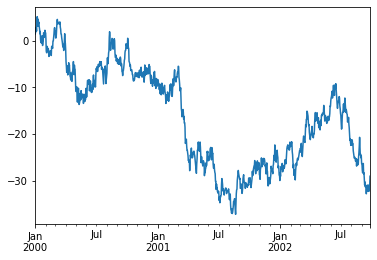

In [ ]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [ ]:
df = df.cumsum()

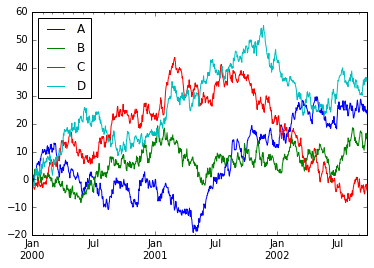

In [ ]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [ ]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [ ]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.122531,-1.112812,0.323025,-0.871716
1,2000-01-02,-1.368579,-2.233524,0.191732,-0.184885
2,2000-01-03,-1.868558,-2.252367,0.662654,-0.659249
3,2000-01-04,-1.659820,-3.069473,1.549426,-1.373770
4,2000-01-05,-2.874397,-3.202589,1.607296,-2.399931
...,...,...,...,...,...
995,2002-09-22,-9.946515,5.699412,28.382004,-14.613354
996,2002-09-23,-9.557023,6.435935,30.647823,-16.399831
997,2002-09-24,-8.641113,6.197793,30.363440,-16.244456
998,2002-09-25,-9.727228,6.947505,30.397368,-18.140887


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [ ]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [ ]:
pd.read_hdf('foo.h5','df')

In [ ]:
print(pd.__version__)

1.3.5


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.122531,-1.112812,0.323025,-0.871716
1,2000-01-02,-1.368579,-2.233524,0.191732,-0.184885
2,2000-01-03,-1.868558,-2.252367,0.662654,-0.659249
3,2000-01-04,-1.659820,-3.069473,1.549426,-1.373770
4,2000-01-05,-2.874397,-3.202589,1.607296,-2.399931
...,...,...,...,...,...
995,2002-09-22,-9.946515,5.699412,28.382004,-14.613354
996,2002-09-23,-9.557023,6.435935,30.647823,-16.399831
997,2002-09-24,-8.641113,6.197793,30.363440,-16.244456
998,2002-09-25,-9.727228,6.947505,30.397368,-18.140887


## Gotchas
If you are trying an operation and you see an exception like:

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

In [ ]:
# Sereis가 어떤 것이 True 인지
# a.any() 혹은 a.all()을 사용하여 조건을 명확히 해야함

In [ ]:
if pd.Series([False, True, False]).any():
    print("I was true")

I was true


In [ ]:
if pd.Series([False, True, False]).all():
  print("I was true")
else:
  print("I was False")

I was False


See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.